## Preparación
Se descarga el DataSet de [Kaggle](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset?resource=download) y se importan las librerías a utilizar. `Numpy` y `Pandas` para trabajar con vectores y matrices multidimensionales. De `Scikit` importamos `train_test_split` para separar los datos en un set de entrenamiento y otro de prueba para probar el modelo. Para graficar la matriz de correlación importamos `matplotlib` y `seaborn`.
Para leer el dataset descargado como csv que descargamos, se utiliza la función `read_csv()` de la librería `Pandas`:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# Para evitar los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

# Importamos el DataSet previamente descargado
dataset = pd.read_csv('AmesHousing.csv')
# Creamos una copia por seguridad.
df = dataset.copy()

In [2]:
# Dividimos en set de entrenamiento y de prueba. Conjunto de pruebas equivalente al 20 % de los datos
train, test = train_test_split(df, test_size=0.2, random_state=42)

print('Cantidad de datos para train: ', len(train))
print('Cantidad de datos para test: ', len(test))

Cantidad de datos para train:  2344
Cantidad de datos para test:  586


In [3]:
#Se configura el formato de los decimales.
pd.options.display.float_format = '{:20.2f}'.format
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Exploración
Se busca reconocer la cantidad de datos faltantes o valores nulos. Para ello, se obtiene la información de cada columna y sus valores estadísticos. Ya entendiendo como funciona nuestro dataset, se obtiene la cantidad de valores faltantes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
# Se obtiene la información estadística en nuestro dataset. Queremos saber la media, desviación estándar, mínimo, máximo, y el percentil 50 (mediana) de cada columna numérica.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order,2930.00,1465.50,845.96,1.00,733.25,1465.50,2197.75,2930.00
PID,2930.00,714464496.99,188730844.65,526301100.00,528477022.50,535453620.00,907181097.50,1007100110.00
MS SubClass,2930.00,57.39,42.64,20.00,20.00,50.00,70.00,190.00
Lot Frontage,2440.00,69.22,23.37,21.00,58.00,68.00,80.00,313.00
Lot Area,2930.00,10147.92,7880.02,1300.00,7440.25,9436.50,11555.25,215245.00
Overall Qual,2930.00,6.09,1.41,1.00,5.00,6.00,7.00,10.00
Overall Cond,2930.00,5.56,1.11,1.00,5.00,5.00,6.00,9.00
Year Built,2930.00,1971.36,30.25,1872.00,1954.00,1973.00,2001.00,2010.00
Year Remod/Add,2930.00,1984.27,20.86,1950.00,1965.00,1993.00,2004.00,2010.00
Mas Vnr Area,2907.00,101.90,179.11,0.00,0.00,0.00,164.00,1600.00


In [6]:
# Se obtiene la cantidad de datos faltantes por columna
num_faltante = df.isna().sum()
# Se excluyen las columnas que no tengan ningún dato faltante
num_faltante = num_faltante[num_faltante > 0]
# Se obtienen los porcentajes de los valores faltantes
porcent_faltante = num_faltante * 100 / df.shape[0]

# Se concatenan y se presentan en una tabla ordenada
pd.concat([num_faltante, porcent_faltante], axis=1, keys=['Valores Faltantes', 'Porcentaje']).sort_values(by="Valores Faltantes", ascending=False)

,Valores Faltantes,Porcentaje
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Qual,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43


## Correlación
Se creará una matriz de correlación entre todas las variables para ver como se correlacionan entre ellas y como nuestras variables de predicción se correlacionan con nuestra variable target. Para ello, buscaremos aquellas con una correlación superior al 60% (0.6)

In [7]:
# A través del método pearson creamos nuestra matriz.
matriz = df.corr(method='pearson')
matriz

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.00,0.17,0.01,-0.01,0.03,-0.05,-0.01,-0.05,-0.08,-0.03,...,-0.01,0.02,0.03,-0.02,0.00,0.05,-0.01,0.13,-0.98,-0.03
PID,0.17,1.00,-0.00,-0.10,0.03,-0.26,0.10,-0.34,-0.16,-0.23,...,-0.05,-0.07,0.16,-0.02,-0.03,-0.00,-0.01,-0.05,0.01,-0.25
MS SubClass,0.01,-0.00,1.00,-0.42,-0.20,0.04,-0.07,0.04,0.04,0.00,...,-0.02,-0.01,-0.02,-0.04,-0.05,-0.00,-0.03,0.00,-0.02,-0.09
Lot Frontage,-0.01,-0.10,-0.42,1.00,0.49,0.21,-0.07,0.12,0.09,0.22,...,0.12,0.16,0.01,0.03,0.08,0.17,0.04,0.01,-0.01,0.36
Lot Area,0.03,0.03,-0.20,0.49,1.00,0.10,-0.03,0.02,0.02,0.13,...,0.16,0.10,0.02,0.02,0.06,0.09,0.07,0.00,-0.02,0.27
Overall Qual,-0.05,-0.26,0.04,0.21,0.10,1.00,-0.09,0.60,0.57,0.43,...,0.26,0.30,-0.14,0.02,0.04,0.03,0.01,0.03,-0.02,0.80
Overall Cond,-0.01,0.10,-0.07,-0.07,-0.03,-0.09,1.00,-0.37,0.05,-0.14,...,0.02,-0.07,0.07,0.04,0.04,-0.02,0.03,-0.01,0.03,-0.10
Year Built,-0.05,-0.34,0.04,0.12,0.02,0.60,-0.37,1.00,0.61,0.31,...,0.23,0.20,-0.37,0.02,-0.04,0.00,-0.01,0.01,-0.01,0.56
Year Remod/Add,-0.08,-0.16,0.04,0.09,0.02,0.57,0.05,0.61,1.00,0.20,...,0.22,0.24,-0.22,0.04,-0.05,-0.01,-0.00,0.02,0.03,0.53
Mas Vnr Area,-0.03,-0.23,0.00,0.22,0.13,0.43,-0.14,0.31,0.20,1.00,...,0.17,0.14,-0.11,0.01,0.07,0.00,0.04,-0.00,-0.02,0.51


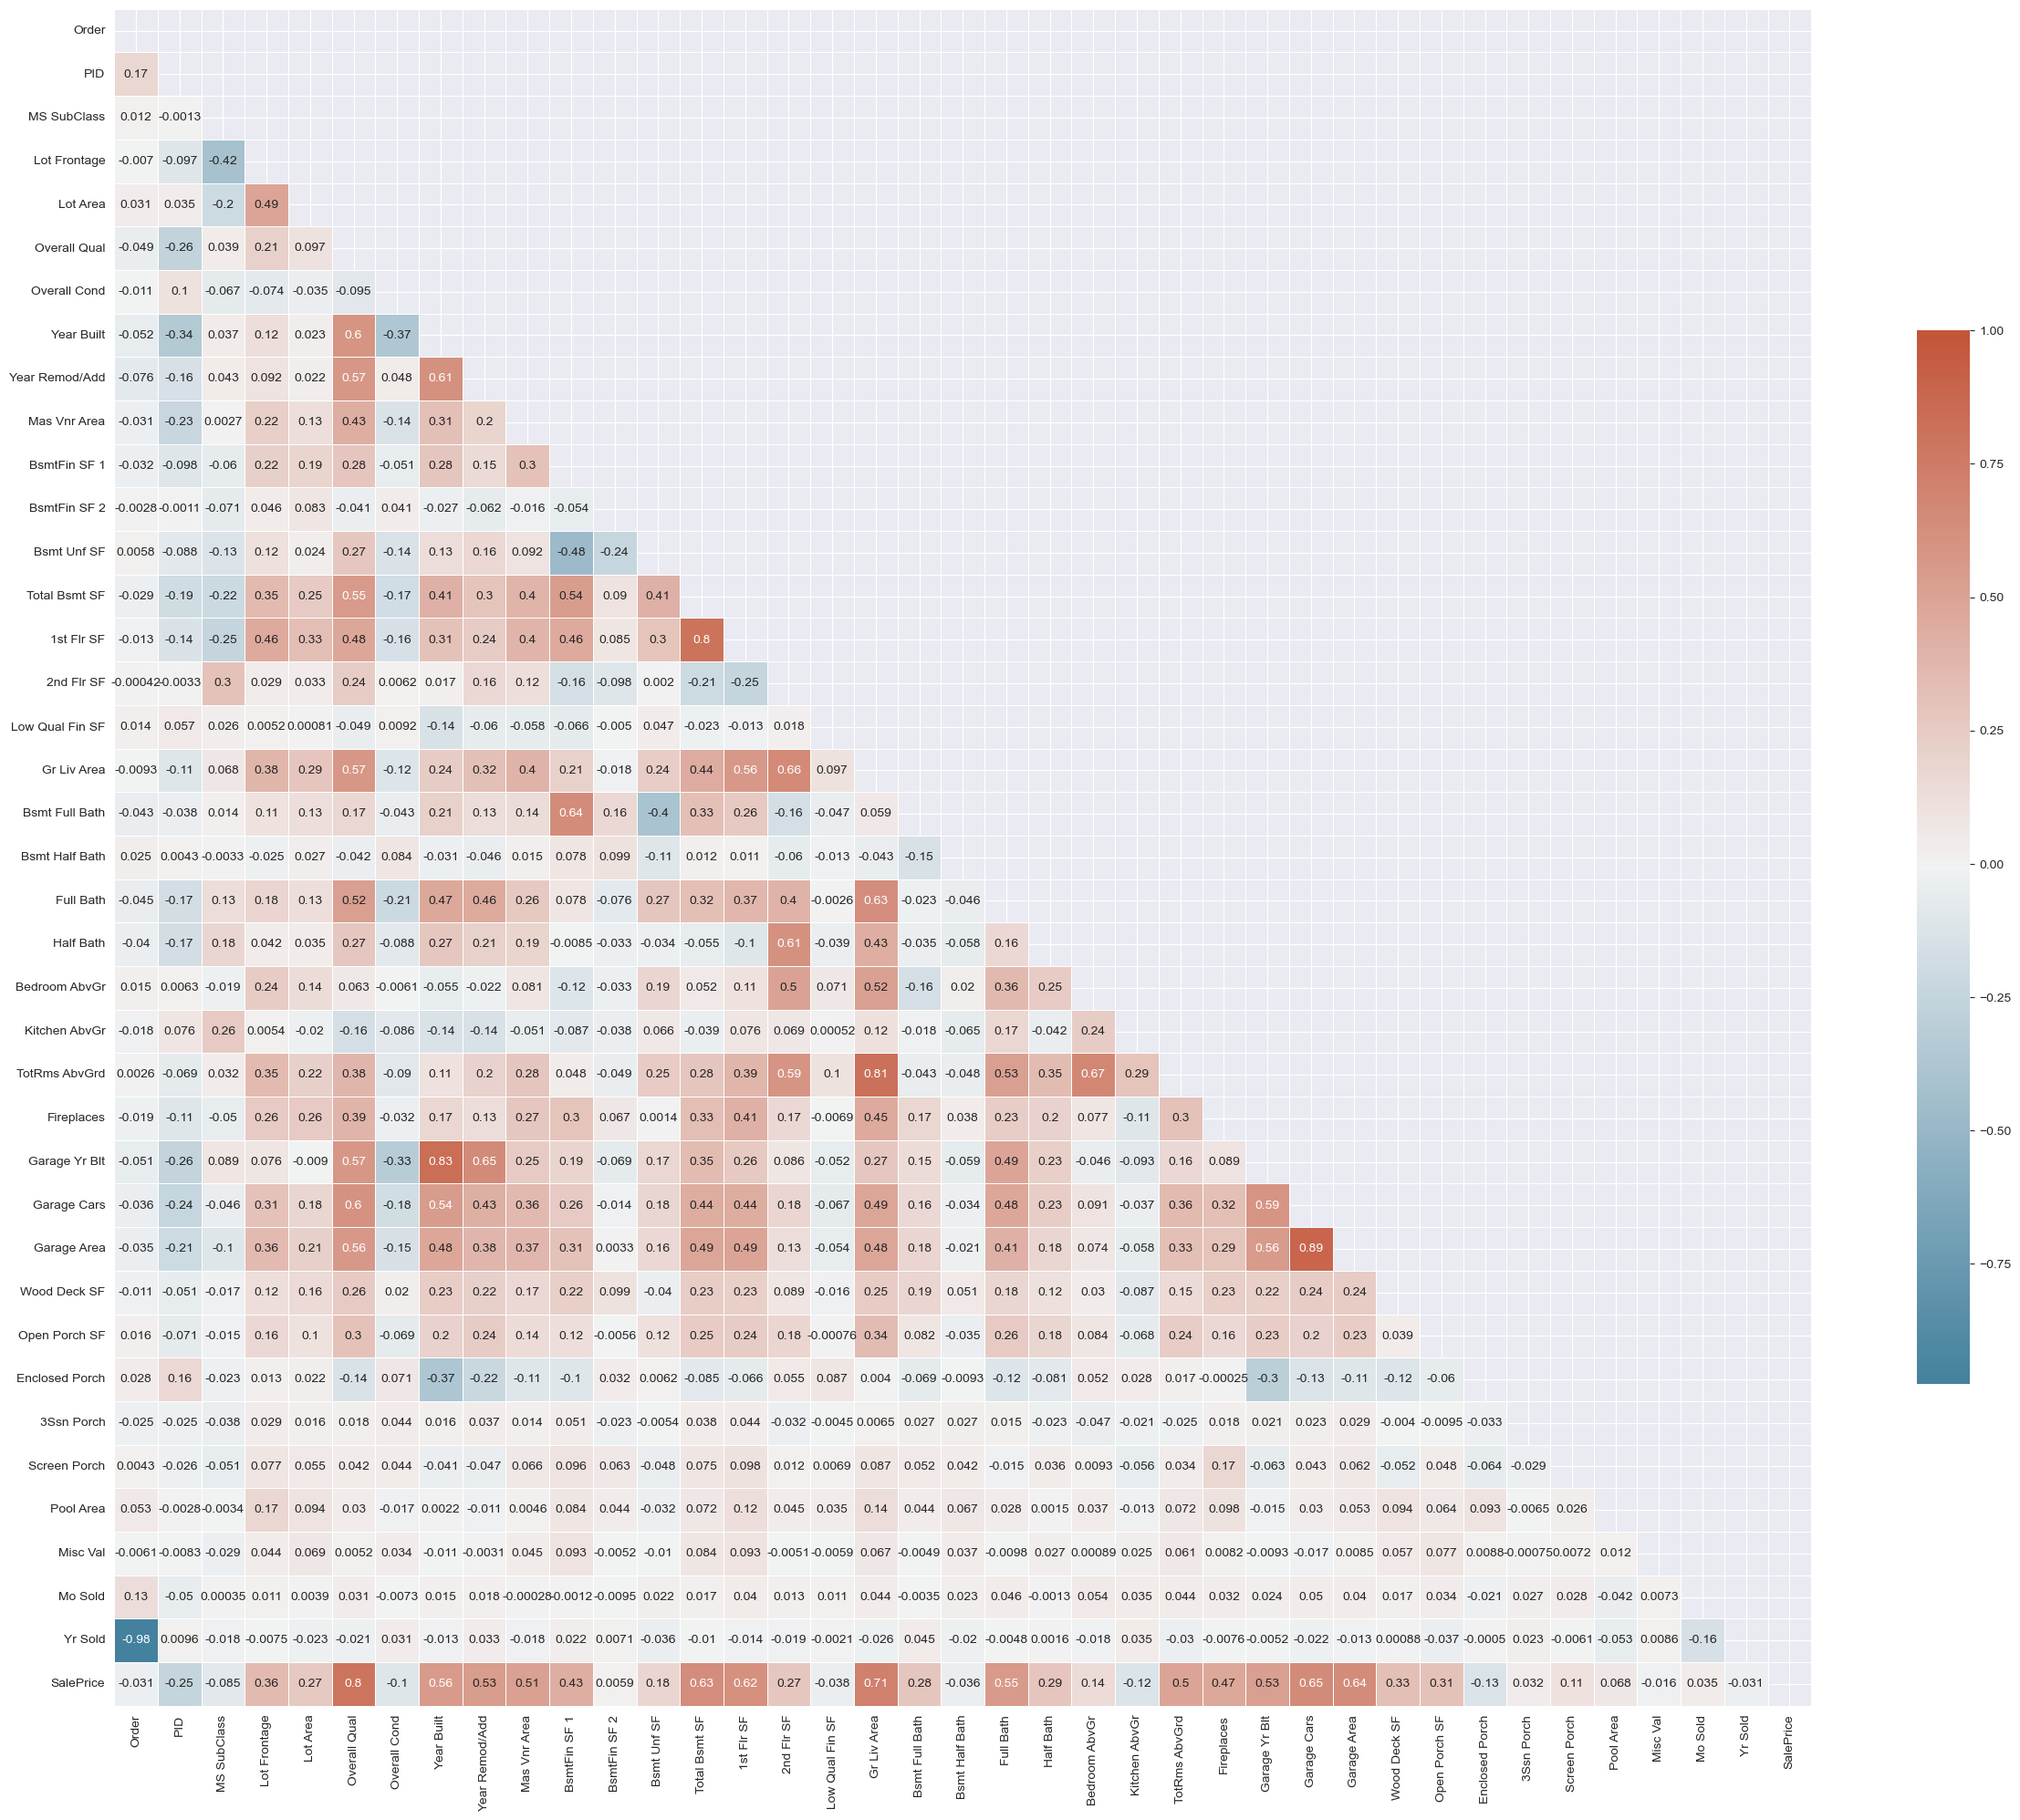

In [8]:
# Para ver la matriz más claramente, generamos una gráfica.
f, ax = plt.subplots(figsize=(30, 30))
mat = df.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [9]:
# Filtramos la correlación por sobre el 60% que presenten las otras variables con nuestra variable target ('SalePrice')
matriz_f = matriz[matriz['SalePrice'] > 0.6]
matriz_f['SalePrice'].sort_values(ascending=False)

SalePrice                       1.00
Overall Qual                    0.80
Gr Liv Area                     0.71
Garage Cars                     0.65
Garage Area                     0.64
Total Bsmt SF                   0.63
1st Flr SF                      0.62
Name: SalePrice, dtype: float64

In [10]:
# Creamos un DataFrame con todas las columnas que cumplen nuestro criterio de correlación sobre 60%
df_top = pd.DataFrame(data=df, columns=['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF'])

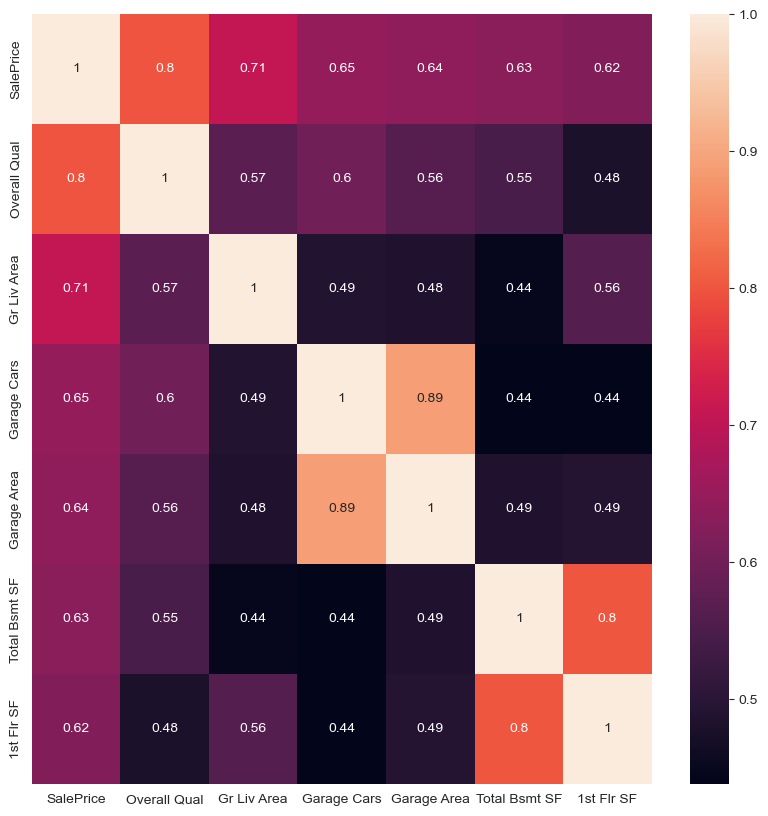

In [11]:
# Graficamos nuestra matriz filtrada.
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_top.corr(),ax=ax,annot=True);